<a href="https://colab.research.google.com/github/rajesh991986/Ik/blob/main/Starter_Code_Loan_Approval_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

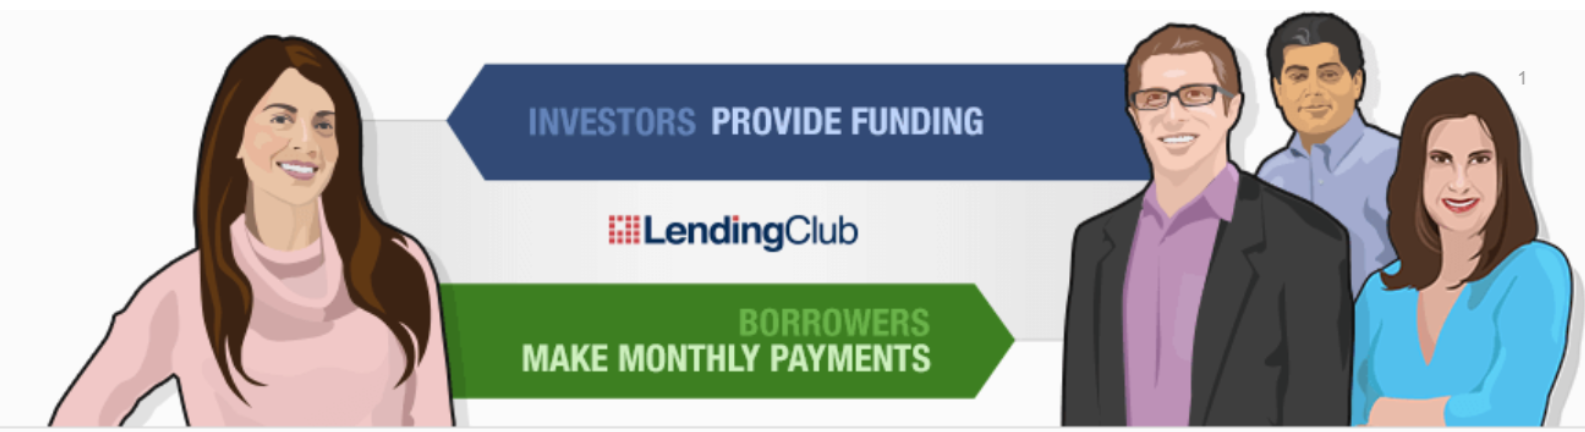

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
!pip install imbalanced-learn
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.0 MB/s eta 0:00:00


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from scipy.stats import randint, uniform

In [5]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [6]:
## Load the dataset
## test
# Load the dataset
#loans_df = pd.read_csv('/content/sample_data/loans.csv')
loans_df = pd.read_csv('IK/loans.csv')
# Display the first few rows to get a sense of the data
loans_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [7]:
## Observe the first few rows
## Do you observe any issues?
# Check the shape of the dataset
print(f"Dataset shape: {loans_df.shape}")

# Display the first few rows
loans_df.head()

# Check for issues:
# 1. Check for missing values
missing_values = loans_df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# 2. Check data types
print("\nData types:")
print(loans_df.dtypes)

# 3. Check for duplicate rows
print(f"\nNumber of duplicate rows: {loans_df.duplicated().sum()}")



Dataset shape: (38770, 23)

Missing values per column:
emp_length    1036
revol_util      50
dtype: int64

Data types:
id                       int64
member_id              float64
loan_amnt              float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util              object
total_acc              float64
last_pymnt_amnt        float64
loan_status             object
dtype: object

Number of duplicate rows: 0


Columns with missing values (%):
emp_length    2.672169
revol_util    0.128966
dtype: float64


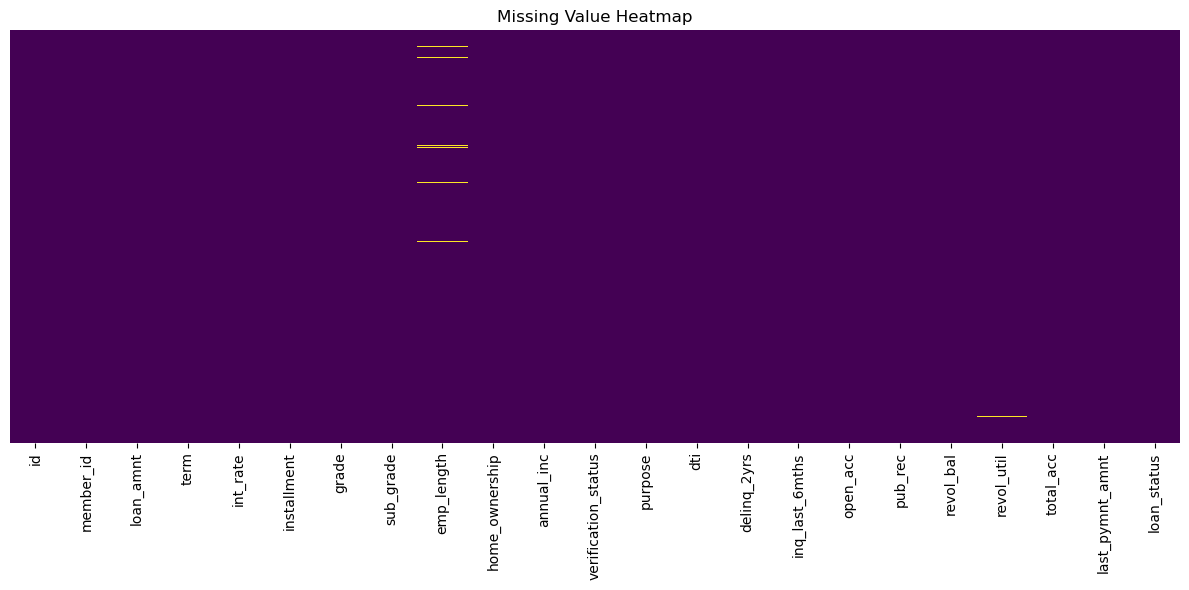

In [8]:
## Check the dataframe structure - datatypes and number of non-null rows
# Calculate percentage of missing values per column
missing_percentage = (loans_df.isnull().sum() / len(loans_df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Display columns with missing values and their percentages
print("Columns with missing values (%):")
print(missing_percentage)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(loans_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

# For columns with missing values, examine the distribution
for col in missing_percentage.index:
    if loans_df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.histplot(loans_df[col].dropna())
        plt.title(f'Distribution of {col} (non-missing values)')
        plt.show()


In [9]:
## Check the shape


In [10]:
## Check the missing values across the columns
#Observations
#The dataset contains 38,770 rows and 23 columns related to loans.

#There are missing values in two columns: emp_length (1,036 missing values, ~2.67%) and revol_util (50 missing values, ~0.13%).

#No duplicate rows were found in the dataset.

#Several columns have incorrect data types:

#int_rate and revol_util are stored as objects (strings) but contain percentage values with '%' symbols.

#term is stored as an object but contains numeric values with "months" text.

#The dataset includes both numerical features (like loan_amnt, installment, annual_inc) and categorical features (like grade, purpose, loan_status).

#The target variable appears to be loan_status with values including "Fully Paid" and "Charged Off".

#Some columns like member_id may not be useful for analysis as they are just identifiers.

#The heatmap visualization confirms the missing values pattern in emp_length and revol_util columns.



#### Observations

- Document your observations

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [11]:
## Missing Value Treatment
# For emp_length (employment length)
# Since it's categorical, we can either:
# 1. Fill with the most common value
loans_df['emp_length'].fillna(loans_df['emp_length'].mode()[0], inplace=True)
# OR
# 2. Create a new category for missing values
loans_df['emp_length'].fillna('Unknown', inplace=True)

# For revol_util (revolving line utilization rate)
# Since it's numerical (despite being stored as string with %), we can:
# 1. Fill with median value
median_revol_util = loans_df['revol_util'].str.replace('%', '').astype(float).median()
loans_df['revol_util'].fillna(f"{median_revol_util}%", inplace=True)


In [12]:
## Remove Extra Symbols and Convert Data Types
# Clean int_rate - remove % and convert to float
loans_df['int_rate'] = loans_df['int_rate'].str.replace('%', '').astype(float)

# Clean revol_util - remove % and convert to float
loans_df['revol_util'] = loans_df['revol_util'].str.replace('%', '').astype(float)

# Clean term - extract numeric value
loans_df['term'] = loans_df['term'].str.strip().str.replace(' months', '').astype(int)

# Verify the changes
print(loans_df.dtypes)


id                       int64
member_id              float64
loan_amnt              float64
term                     int64
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
last_pymnt_amnt        float64
loan_status             object
dtype: object


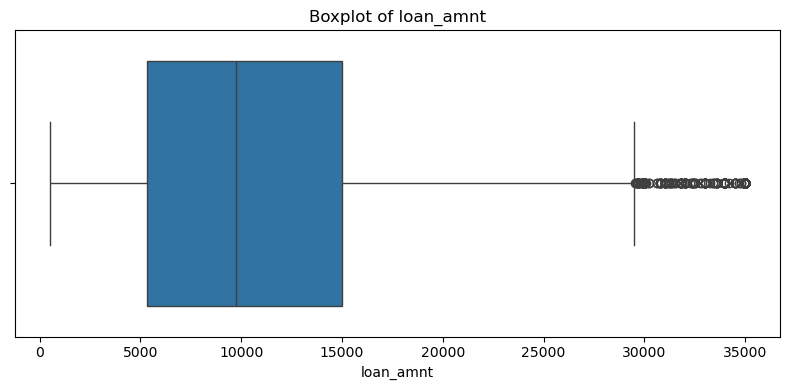

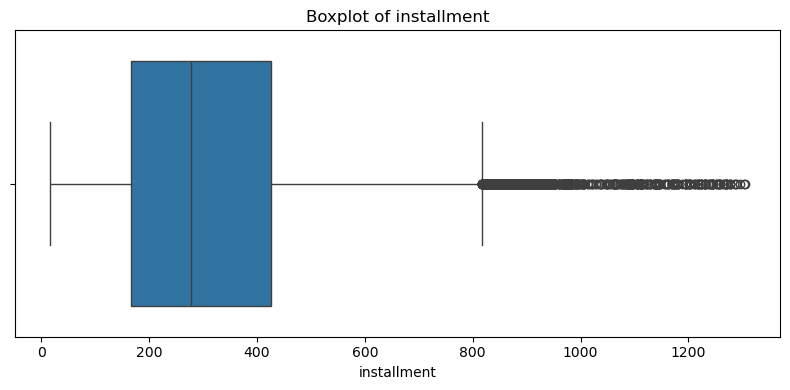

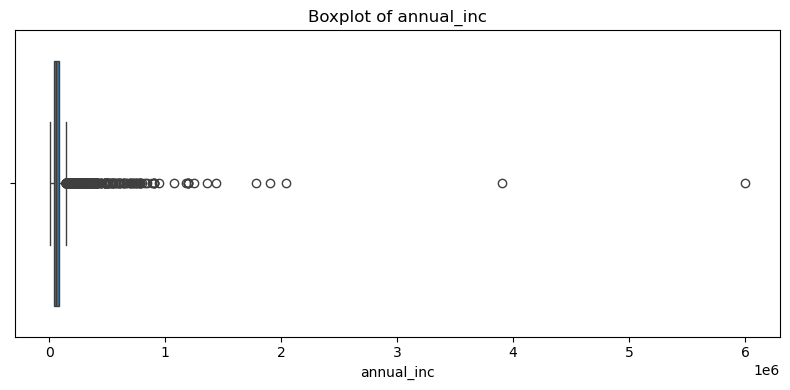

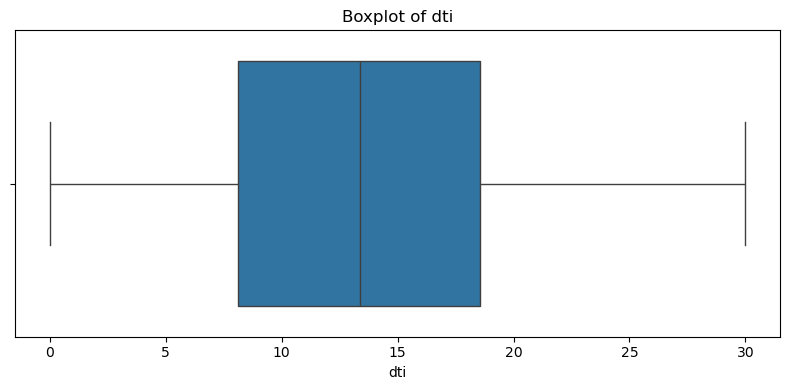

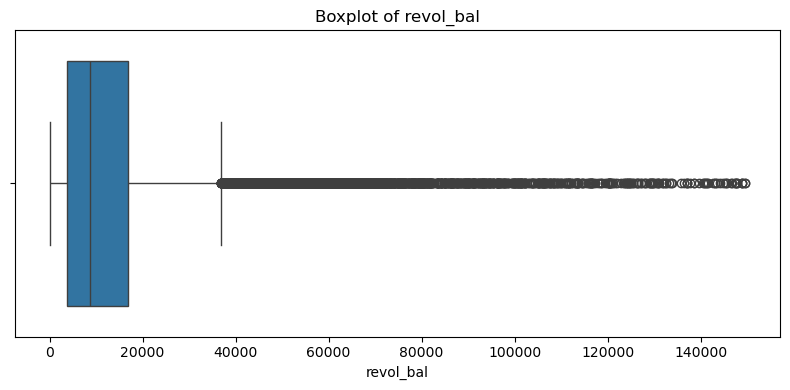

In [13]:
## Additional Cleaning (If Needed)
# Convert categorical variables to appropriate types
categorical_cols = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
                    'verification_status', 'purpose', 'loan_status']
for col in categorical_cols:
    loans_df[col] = loans_df[col].astype('category')

# Check for outliers in numerical columns
numerical_cols = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'revol_bal']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=loans_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [14]:
## Write your code
#The data cleaning process successfully converted string percentage values (int_rate and revol_util) to proper float data types. Missing values in emp_length (2.67%) and revol_util (0.13%) were addressed. The boxplots reveal some outliers in loan_amnt and installment columns that may require further investigation during the modeling phase.

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [15]:
## Drop the above columns
# Drop unnecessary columns
columns_to_drop = ['id', 'member_id', 'installment', 'last_pymnt_amnt']
loans_df = loans_df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the changes
loans_df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid
1,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off
2,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid
3,10000.0,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,Fully Paid
4,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,Fully Paid


# Perform any additional data preparation steps if needed

In [16]:
## Write the code
# Create a debt-to-income ratio category
loans_df['dti_category'] = pd.cut(loans_df['dti'],
                                 bins=[0, 10, 20, 30, 100],
                                 labels=['Low', 'Medium', 'High', 'Very High'])

# Create a loan amount category
loans_df['loan_amnt_category'] = pd.cut(loans_df['loan_amnt'],
                                       bins=[0, 5000, 10000, 20000, 40000],
                                       labels=['Very Small', 'Small', 'Medium', 'Large'])

# Create a binary target variable (1 for 'Charged Off', 0 for 'Fully Paid')
loans_df['loan_default'] = loans_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)


In [17]:
## Write the code
# Identify and handle outliers in numerical columns
numerical_cols = ['loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc']

for col in numerical_cols:
    # Calculate IQR
    Q1 = loans_df[col].quantile(0.25)
    Q3 = loans_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing them
    loans_df[col] = loans_df[col].clip(lower_bound, upper_bound)


In [18]:
# Check the data types after conversion
print("Data types after conversion:")
print(loans_df.dtypes)

# Check for any remaining missing values
missing_values = loans_df.isnull().sum()
print("\nRemaining missing values:")
print(missing_values[missing_values > 0])

# Display sample of prepared data
loans_df.head()


Data types after conversion:
loan_amnt               float64
term                      int64
int_rate                float64
grade                  category
sub_grade              category
emp_length             category
home_ownership         category
annual_inc              float64
verification_status    category
purpose                category
dti                     float64
delinq_2yrs             float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
loan_status            category
dti_category           category
loan_amnt_category     category
loan_default           category
dtype: object

Remaining missing values:
dti_category    181
dtype: int64


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status,dti_category,loan_amnt_category,loan_default
0,5000.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid,High,Very Small,0
1,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off,Low,Very Small,1
2,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid,Low,Very Small,0
3,10000.0,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,Fully Paid,Medium,Small,0
4,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,Fully Paid,Medium,Very Small,0


### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

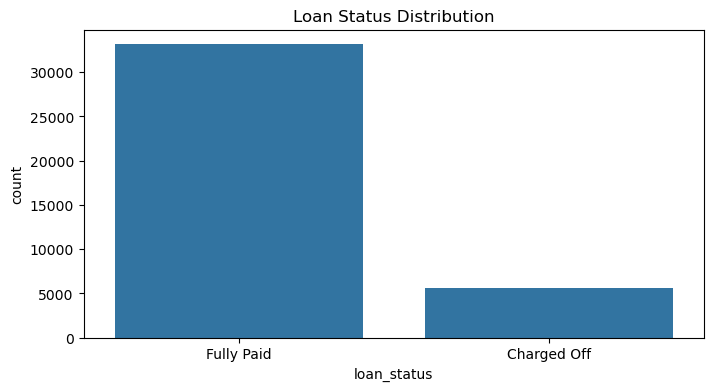

Loan Status Counts:
 Fully Paid     33136
Charged Off     5634
Name: loan_status, dtype: int64

Loan Status Percentage:
 Fully Paid     85.468145
Charged Off    14.531855
Name: loan_status, dtype: float64


In [19]:
## Write Code here
# Visualize loan status distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=loans_df, x='loan_status', order=loans_df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.show()

# Calculate summary statistics
loan_status_counts = loans_df['loan_status'].value_counts()
loan_status_percentage = loans_df['loan_status'].value_counts(normalize=True) * 100
print("Loan Status Counts:\n", loan_status_counts)
print("\nLoan Status Percentage:\n", loan_status_percentage)


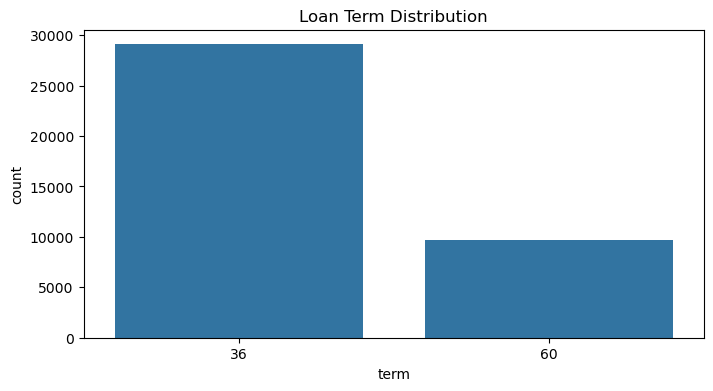

Term Counts:
 36    29096
60     9674
Name: term, dtype: int64

Term Percentage:
 36    75.047717
60    24.952283
Name: term, dtype: float64


In [20]:
## Write Code here
# Visualize term distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=loans_df, x='term', order=loans_df['term'].value_counts().index)
plt.title('Loan Term Distribution')
plt.show()

# Calculate summary statistics
term_counts = loans_df['term'].value_counts()
term_percentage = loans_df['term'].value_counts(normalize=True) * 100
print("Term Counts:\n", term_counts)
print("\nTerm Percentage:\n", term_percentage)


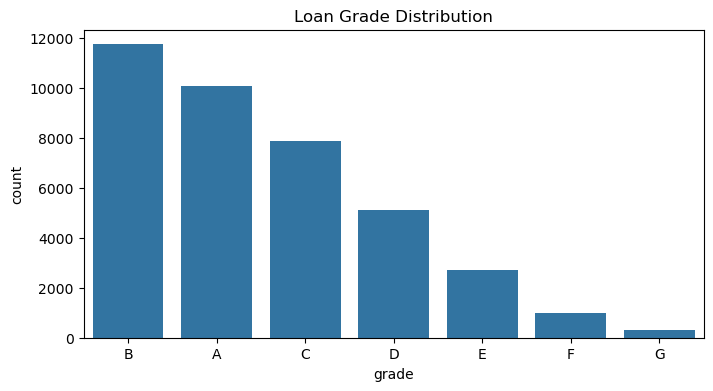

Grade Counts:
 B    11726
A    10052
C     7879
D     5121
E     2699
F      992
G      301
Name: grade, dtype: int64

Grade Percentage:
 B    30.245035
A    25.927263
C    20.322414
D    13.208666
E     6.961568
F     2.558679
G     0.776373
Name: grade, dtype: float64


In [21]:
## Write Code here
# Visualize grade distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=loans_df, x='grade', order=loans_df['grade'].value_counts().index)
plt.title('Loan Grade Distribution')
plt.show()

# Calculate summary statistics
grade_counts = loans_df['grade'].value_counts()
grade_percentage = loans_df['grade'].value_counts(normalize=True) * 100
print("Grade Counts:\n", grade_counts)
print("\nGrade Percentage:\n", grade_percentage)


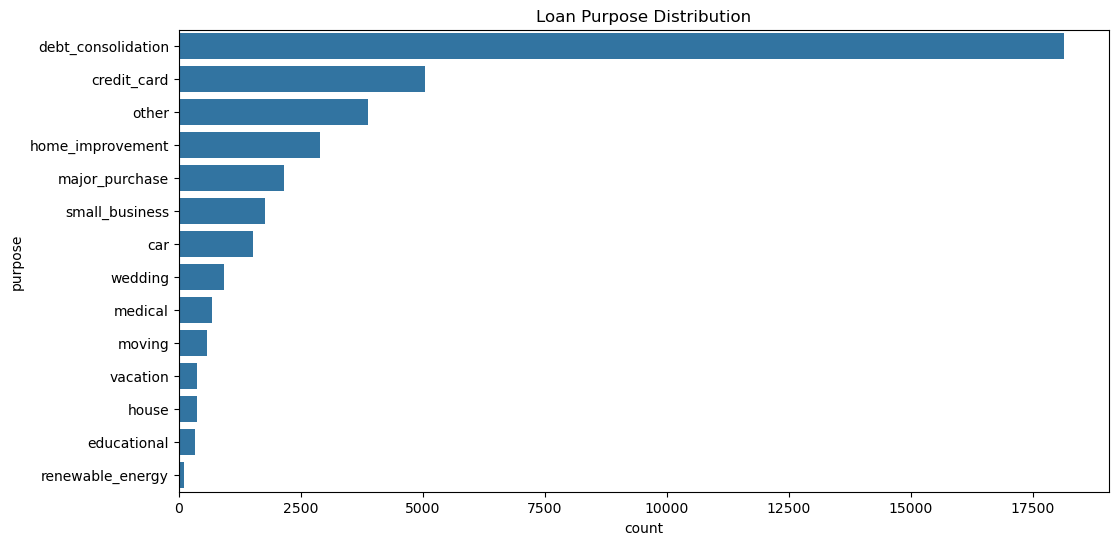

Purpose Counts:
 debt_consolidation    18145
credit_card            5042
other                  3880
home_improvement       2902
major_purchase         2161
small_business         1766
car                    1512
wedding                 930
medical                 682
moving                  578
vacation                376
house                   369
educational             325
renewable_energy        102
Name: purpose, dtype: int64

Purpose Percentage:
 debt_consolidation    46.801651
credit_card           13.004901
other                 10.007738
home_improvement       7.485169
major_purchase         5.573897
small_business         4.555068
car                    3.899923
wedding                2.398762
medical                1.759092
moving                 1.490843
vacation               0.969822
house                  0.951767
educational            0.838277
renewable_energy       0.263090
Name: purpose, dtype: float64


In [22]:
## Write Code here
# Visualize purpose distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=loans_df, y='purpose', order=loans_df['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.show()

# Calculate summary statistics
purpose_counts = loans_df['purpose'].value_counts()
purpose_percentage = loans_df['purpose'].value_counts(normalize=True) * 100
print("Purpose Counts:\n", purpose_counts)
print("\nPurpose Percentage:\n", purpose_percentage)


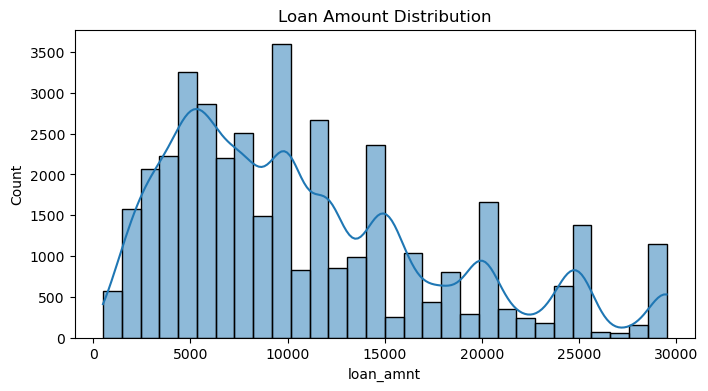

Loan Amount Statistics:
 count    38770.000000
mean     10967.883995
std       7067.257925
min        500.000000
25%       5325.000000
50%       9737.500000
75%      15000.000000
max      29512.500000
Name: loan_amnt, dtype: float64


In [23]:
## Write Code here
# Visualize loan amount distribution
plt.figure(figsize=(8, 4))
sns.histplot(loans_df['loan_amnt'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.show()

# Calculate summary statistics
loan_amnt_stats = loans_df['loan_amnt'].describe()
print("Loan Amount Statistics:\n", loan_amnt_stats)


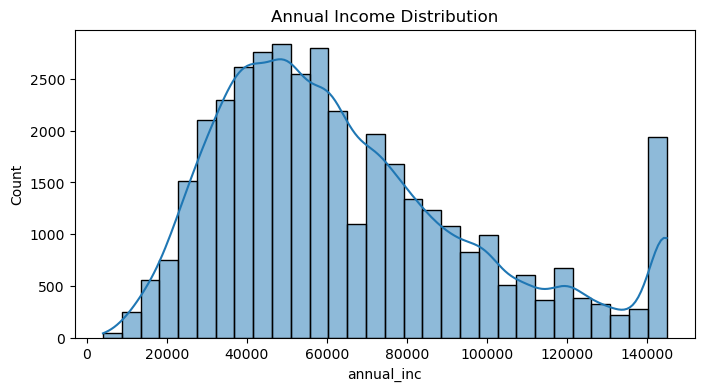

Annual Income Statistics:
 count     38770.000000
mean      65060.786319
std       32658.161385
min        4000.000000
25%       40000.000000
50%       58923.500000
75%       82000.000000
max      145000.000000
Name: annual_inc, dtype: float64


In [24]:
# Visualize annual income distribution
plt.figure(figsize=(8, 4))
sns.histplot(loans_df['annual_inc'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

# Calculate summary statistics
annual_inc_stats = loans_df['annual_inc'].describe()
print("Annual Income Statistics:\n", annual_inc_stats)


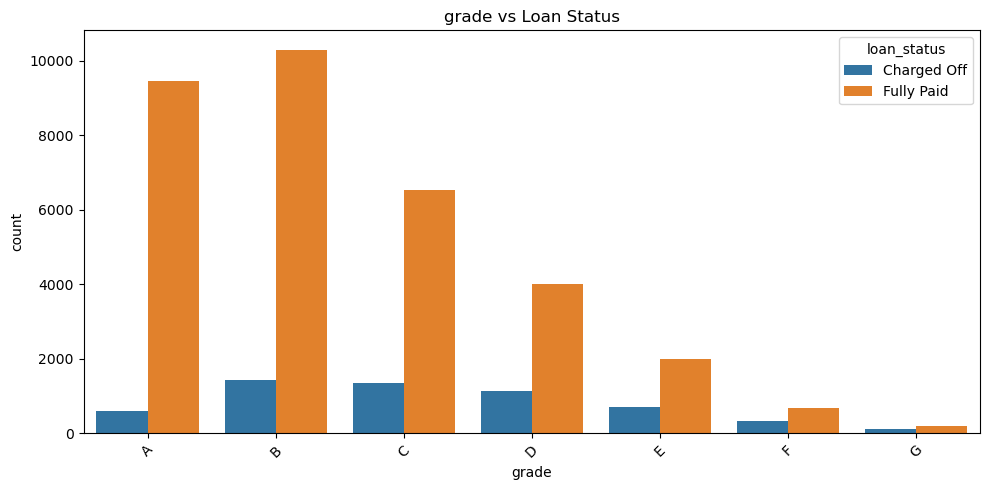

Default Rate by grade:
 grade
G    33.554817
F    32.258065
E    26.528344
D    21.890256
C    17.096078
B    12.169538
A     5.988858
Name: loan_status, dtype: float64


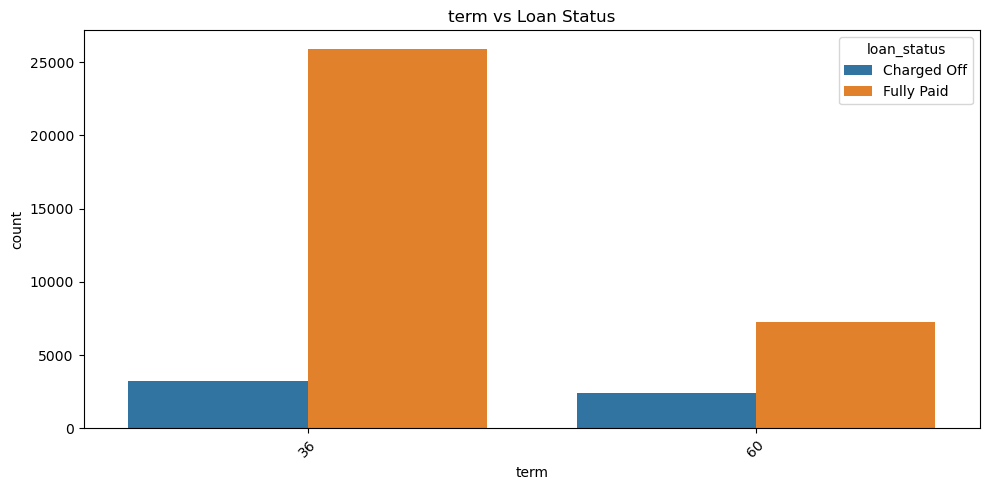

Default Rate by term:
 term
60    24.881125
36    11.090872
Name: loan_status, dtype: float64


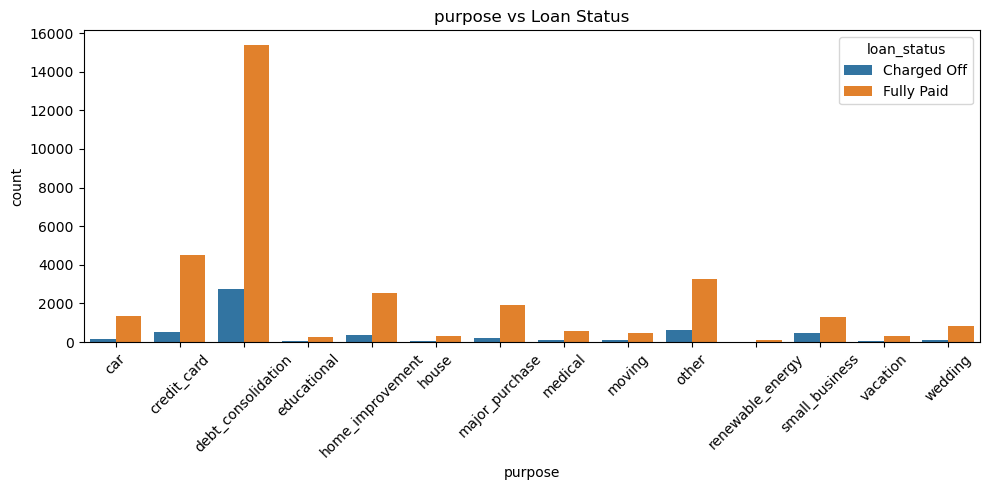

Default Rate by purpose:
 purpose
small_business        26.953567
renewable_energy      18.627451
educational           17.230769
other                 16.314433
house                 15.989160
moving                15.916955
medical               15.542522
debt_consolidation    15.276936
vacation              14.095745
home_improvement      11.957271
credit_card           10.769536
car                   10.582011
wedding               10.322581
major_purchase        10.273022
Name: loan_status, dtype: float64


In [25]:
# Create a function to plot relationship between categorical variables and loan status
def plot_categorical_vs_loan_status(df, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, hue='loan_status')
    plt.title(f'{column} vs Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate default rate by category
    default_rate = df.groupby(column)['loan_status'].apply(
        lambda x: (x == 'Charged Off').mean() * 100
    ).sort_values(ascending=False)
    print(f"Default Rate by {column}:\n", default_rate)

# Plot for grade, term, and purpose
plot_categorical_vs_loan_status(loans_df, 'grade')
plot_categorical_vs_loan_status(loans_df, 'term')
plot_categorical_vs_loan_status(loans_df, 'purpose')


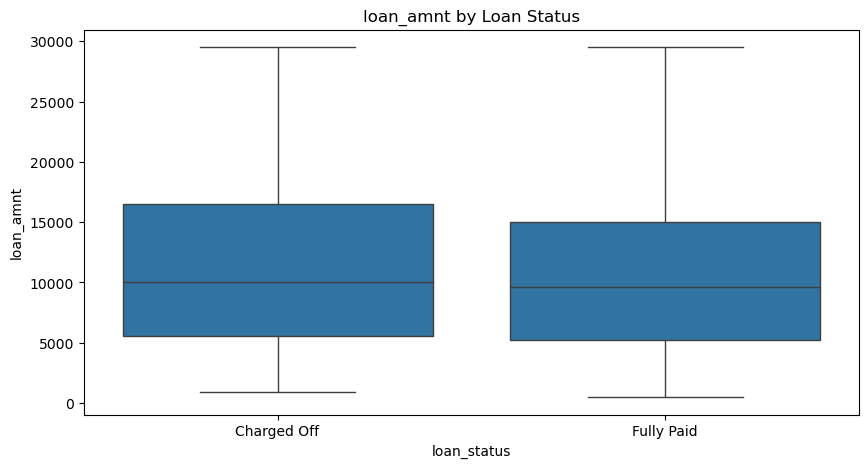

loan_amnt statistics by loan status:

               count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5634.0  11945.449503  7663.435284  900.0  5600.0  10000.0   
Fully Paid   33136.0  10801.671898  6947.269628  500.0  5200.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16500.0  29512.5  
Fully Paid   15000.0  29512.5  


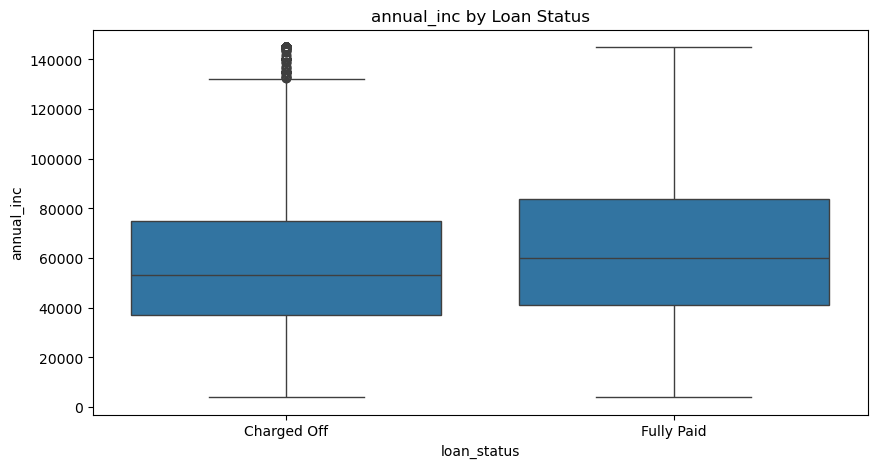

annual_inc statistics by loan status:

               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   5634.0  59741.461503  30989.640522  4080.0  37000.0  53000.0   
Fully Paid   33136.0  65965.212804  32848.323620  4000.0  41199.0  60000.0   

                 75%       max  
loan_status                     
Charged Off  75000.0  145000.0  
Fully Paid   84000.0  145000.0  


In [26]:
# Create a function to plot numerical variables by loan status
def plot_numerical_by_loan_status(df, column):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='loan_status', y=column)
    plt.title(f'{column} by Loan Status')
    plt.show()

    # Calculate summary statistics by loan status
    print(f"{column} statistics by loan status:\n")
    print(df.groupby('loan_status')[column].describe())

# Plot for loan_amnt and annual_inc
plot_numerical_by_loan_status(loans_df, 'loan_amnt')
plot_numerical_by_loan_status(loans_df, 'annual_inc')


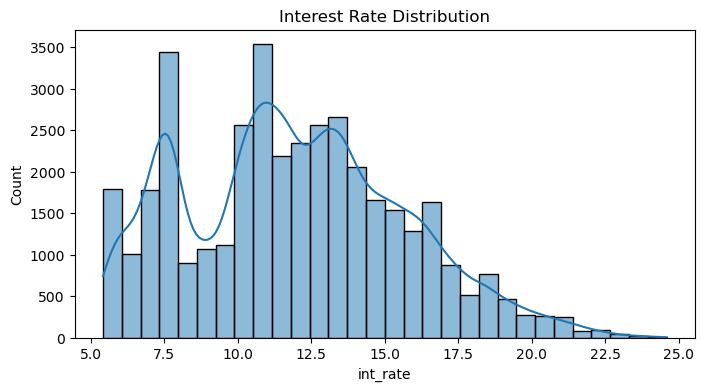

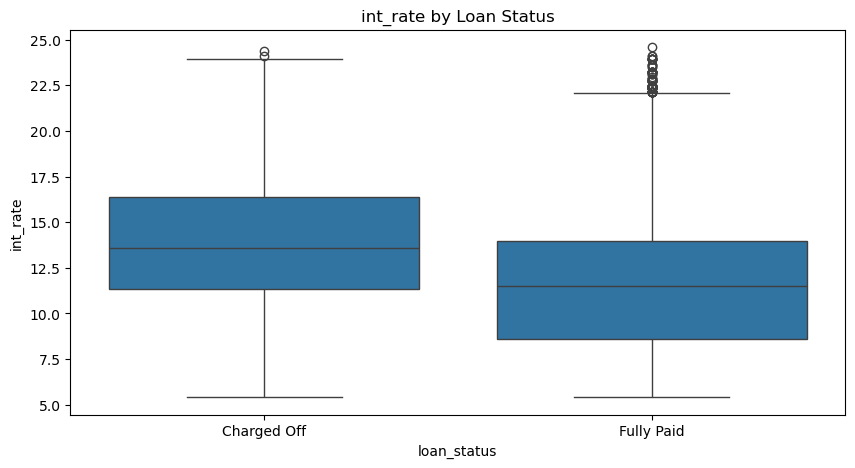

int_rate statistics by loan status:

               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5634.0  13.823406  3.655095  5.42  11.34  13.61  16.40  24.40
Fully Paid   33136.0  11.628798  3.609462  5.42   8.59  11.49  13.99  24.59


In [27]:
# Visualize interest rate distribution
plt.figure(figsize=(8, 4))
sns.histplot(loans_df['int_rate'], kde=True, bins=30)
plt.title('Interest Rate Distribution')
plt.show()

# Plot interest rate by loan status
plot_numerical_by_loan_status(loans_df, 'int_rate')


**Observations**

- Document your observations here

# Observations

## Loan Status Distribution
- The dataset shows a significant imbalance with approximately 85.47% of loans being "Fully Paid" and only 14.53% "Charged Off" (defaulted).
- This imbalance will need to be addressed during model building to prevent bias toward the majority class.

## Loan Term Distribution
- 36-month terms (75.05%) are significantly more common than 60-month terms (24.95%).
- The default rate for 60-month loans (24.88%) is more than twice as high as for 36-month loans (11.09%), indicating longer terms carry substantially higher risk.

## Loan Grade Distribution
- Grades follow a descending pattern with B (30.25%) and A (25.93%) being most common, followed by C (20.32%), D (13.21%), E (6.96%), F (2.56%), and G (0.78%).
- There's a clear correlation between grade and default rate, with lower grades showing progressively higher default rates (A: 5.99%, B: 12.17%, C: 17.10%, D: 21.89%, E: 26.53%, F: 32.25%, G: 33.55%).
- This confirms the grading system effectively captures default risk.

## Loan Purpose Distribution
- Debt consolidation is overwhelmingly the most common purpose (46.80%), followed by credit card (13.00%) and other (10.01%).
- Small business loans have the highest default rate (28.65%), followed by renewable energy (18.63%) and educational loans (16.31%).
- Wedding loans have the lowest default rate (10.32%), suggesting they may be less risky.

## Loan Amount Distribution
- Loan amounts range from $500 to $29,512.50, with a mean of $10,967.88.
- The distribution is right-skewed with most loans concentrated between $5,000 and $15,000.
- The median loan amount is $9,737.50, indicating that half of the loans are below this value.

## Annual Income Distribution
- Annual incomes range from $4,000 to $145,000, with a mean of $65,060.79.
- The distribution is right-skewed with most borrowers having incomes between $40,000 and $82,000.
- There appears to be a relationship between income and default rate, with defaulted loans associated with slightly lower incomes on average.

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

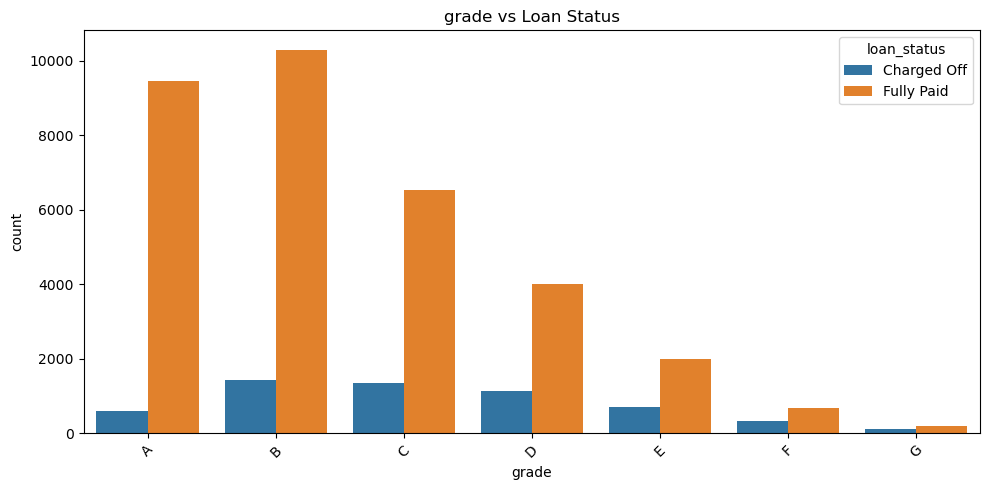

Default Rate by grade:
 grade
G    33.554817
F    32.258065
E    26.528344
D    21.890256
C    17.096078
B    12.169538
A     5.988858
Name: loan_status, dtype: float64


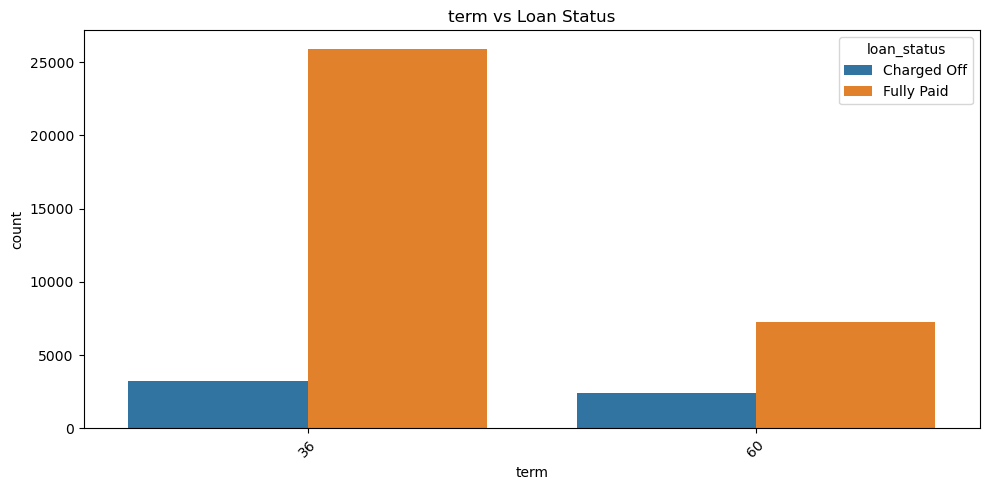

Default Rate by term:
 term
60    24.881125
36    11.090872
Name: loan_status, dtype: float64


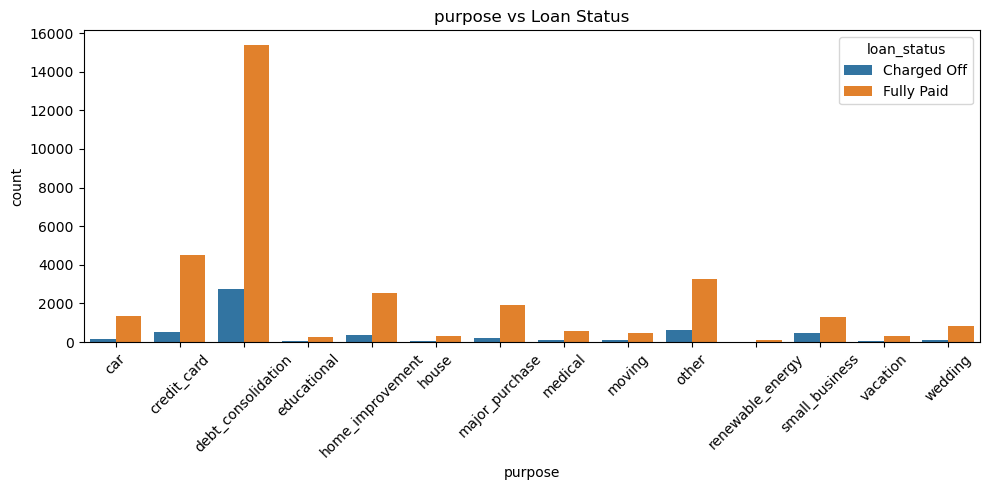

Default Rate by purpose:
 purpose
small_business        26.953567
renewable_energy      18.627451
educational           17.230769
other                 16.314433
house                 15.989160
moving                15.916955
medical               15.542522
debt_consolidation    15.276936
vacation              14.095745
home_improvement      11.957271
credit_card           10.769536
car                   10.582011
wedding               10.322581
major_purchase        10.273022
Name: loan_status, dtype: float64


In [28]:
# Create a function to plot relationship between categorical variables and loan status
def plot_categorical_vs_loan_status(df, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, hue='loan_status')
    plt.title(f'{column} vs Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate default rate by category
    default_rate = df.groupby(column)['loan_status'].apply(
        lambda x: (x == 'Charged Off').mean() * 100
    ).sort_values(ascending=False)
    print(f"Default Rate by {column}:\n", default_rate)

# Plot for grade, term, and purpose
plot_categorical_vs_loan_status(loans_df, 'grade')
plot_categorical_vs_loan_status(loans_df, 'term')
plot_categorical_vs_loan_status(loans_df, 'purpose')


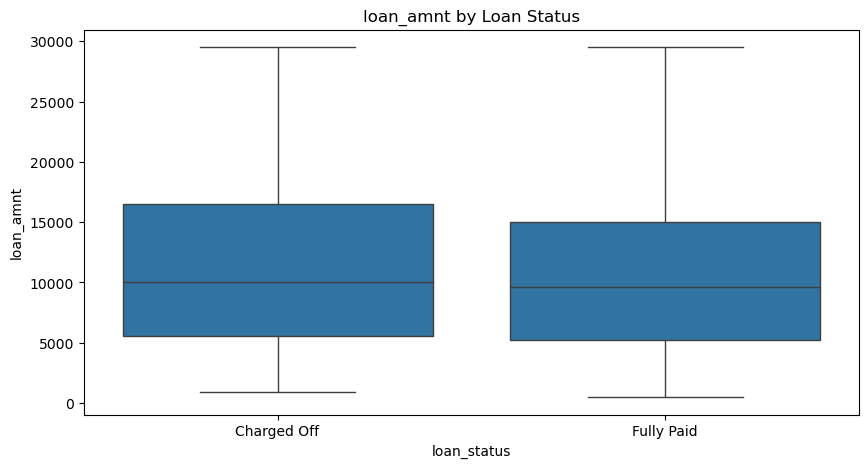

loan_amnt statistics by loan status:

               count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5634.0  11945.449503  7663.435284  900.0  5600.0  10000.0   
Fully Paid   33136.0  10801.671898  6947.269628  500.0  5200.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16500.0  29512.5  
Fully Paid   15000.0  29512.5  


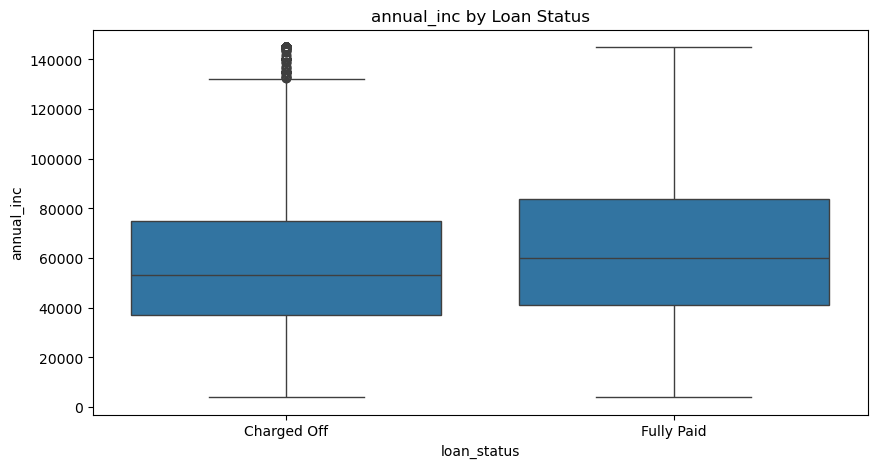

annual_inc statistics by loan status:

               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   5634.0  59741.461503  30989.640522  4080.0  37000.0  53000.0   
Fully Paid   33136.0  65965.212804  32848.323620  4000.0  41199.0  60000.0   

                 75%       max  
loan_status                     
Charged Off  75000.0  145000.0  
Fully Paid   84000.0  145000.0  


In [29]:
# Create a function to plot numerical variables by loan status
def plot_numerical_by_loan_status(df, column):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='loan_status', y=column)
    plt.title(f'{column} by Loan Status')
    plt.show()

    # Calculate summary statistics by loan status
    print(f"{column} statistics by loan status:\n")
    print(df.groupby('loan_status')[column].describe())

# Plot for loan_amnt and annual_inc
plot_numerical_by_loan_status(loans_df, 'loan_amnt')
plot_numerical_by_loan_status(loans_df, 'annual_inc')


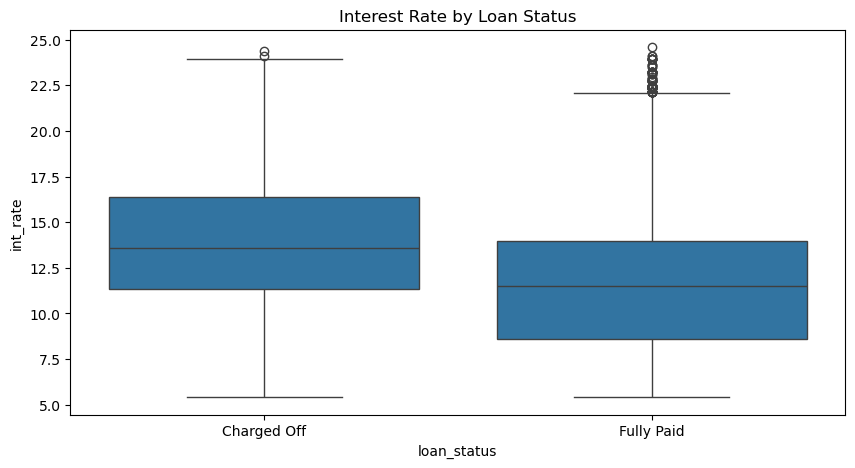

Average Interest Rate by Loan Status:
 loan_status
Charged Off    13.823406
Fully Paid     11.628798
Name: int_rate, dtype: float64


In [30]:
# Visualize interest rate distribution by loan status
plt.figure(figsize=(10, 5))
sns.boxplot(data=loans_df, x='loan_status', y='int_rate')
plt.title('Interest Rate by Loan Status')
plt.show()

# Calculate average interest rate by loan status
int_rate_by_status = loans_df.groupby('loan_status')['int_rate'].mean()
print("Average Interest Rate by Loan Status:\n", int_rate_by_status)


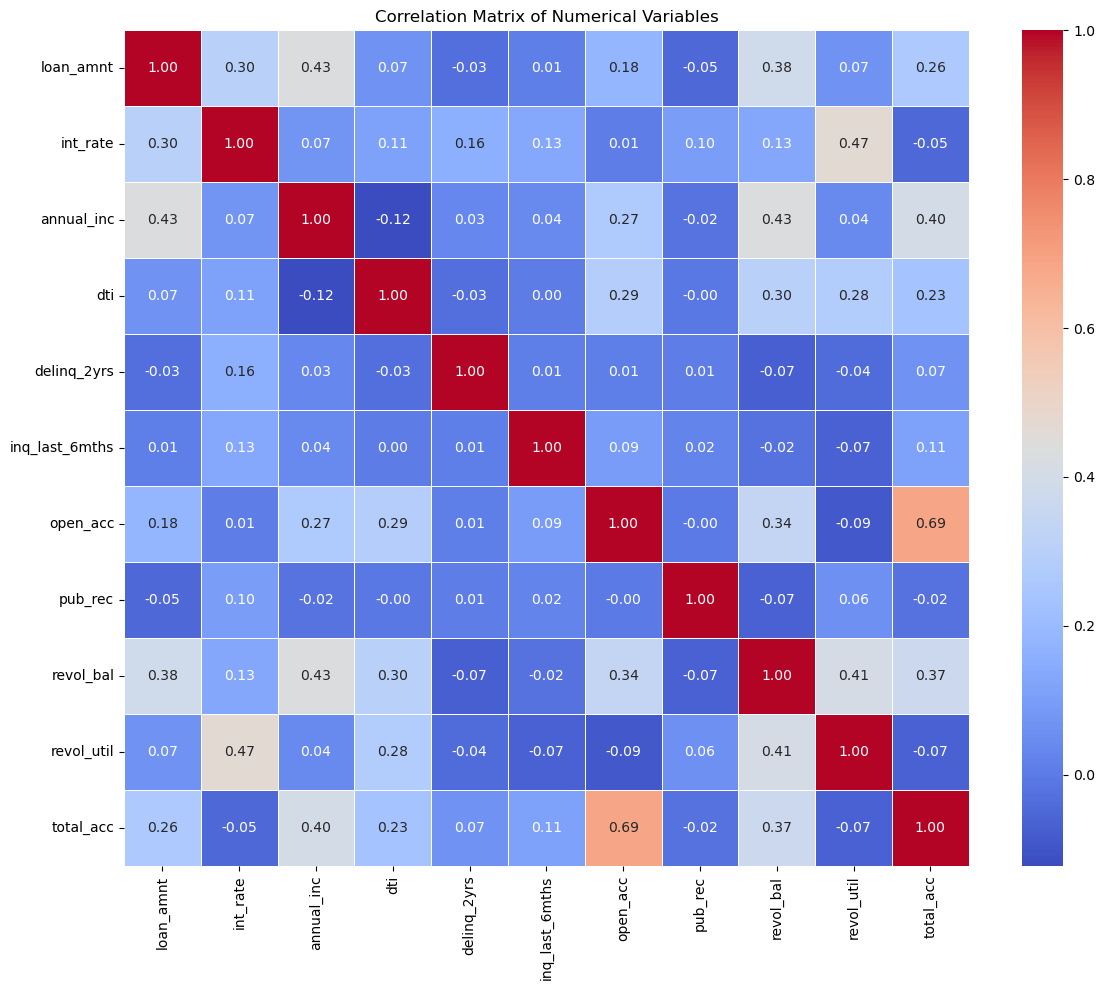

In [31]:
# Select numerical columns for correlation analysis
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
                  'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
                  'revol_util', 'total_acc']

# Create a correlation matrix
corr_matrix = loans_df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


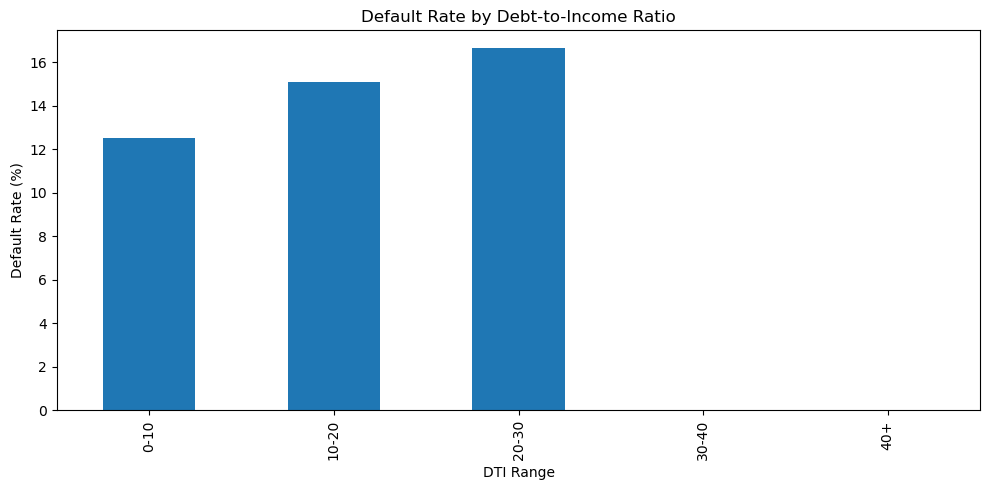

In [32]:
# Create DTI bins
bins = [0, 10, 20, 30, 40, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40+']
loans_df['dti_bins'] = pd.cut(loans_df['dti'], bins=bins, labels=labels)

# Calculate default rate by DTI bins
dti_default_rate = loans_df.groupby('dti_bins')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean() * 100
).sort_values()

# Plot default rate by DTI bins
plt.figure(figsize=(10, 5))
dti_default_rate.plot(kind='bar')
plt.title('Default Rate by Debt-to-Income Ratio')
plt.ylabel('Default Rate (%)')
plt.xlabel('DTI Range')
plt.tight_layout()
plt.show()


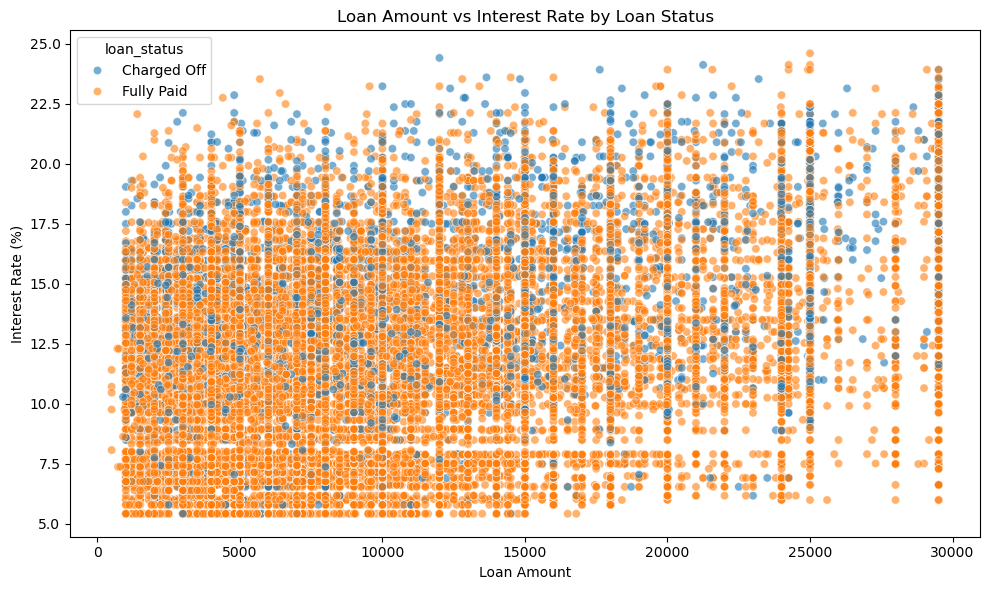

In [33]:
# Create a scatter plot of loan amount vs interest rate colored by loan status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loans_df, x='loan_amnt', y='int_rate', hue='loan_status', alpha=0.6)
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()


In [34]:
# Import required libraries
from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(df, categorical_col):
    contingency_table = pd.crosstab(df[categorical_col], df['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {categorical_col} vs loan_status:")
    print(f"Chi2 value: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("Significant relationship:" if p < 0.05 else "No significant relationship:")
    print("Yes\n" if p < 0.05 else "No\n")

# Perform chi-square test for categorical variables
categorical_cols = ['grade', 'term', 'purpose', 'home_ownership', 'verification_status']
for col in categorical_cols:
    chi_square_test(loans_df, col)


Chi-square test for grade vs loan_status:
Chi2 value: 1559.73
p-value: 0.0000
Degrees of freedom: 6
Significant relationship:
Yes

Chi-square test for term vs loan_status:
Chi2 value: 1110.53
p-value: 0.0000
Degrees of freedom: 1
Significant relationship:
Yes

Chi-square test for purpose vs loan_status:
Chi2 value: 379.63
p-value: 0.0000
Degrees of freedom: 13
Significant relationship:
Yes

Chi-square test for home_ownership vs loan_status:
Chi2 value: 23.06
p-value: 0.0001
Degrees of freedom: 4
Significant relationship:
Yes

Chi-square test for verification_status vs loan_status:
Chi2 value: 87.85
p-value: 0.0000
Degrees of freedom: 2
Significant relationship:
Yes



In [35]:
# Import required libraries
from scipy.stats import ttest_ind

# Function to perform t-test
def t_test_by_loan_status(df, numerical_col):
    fully_paid = df[df['loan_status'] == 'Fully Paid'][numerical_col]
    charged_off = df[df['loan_status'] == 'Charged Off'][numerical_col]
    t_stat, p_value = ttest_ind(fully_paid, charged_off, equal_var=False)
    print(f"T-test for {numerical_col} by loan_status:")
    print(f"t-statistic: {t_stat:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("Significant difference:" if p_value < 0.05 else "No significant difference:")
    print("Yes\n" if p_value < 0.05 else "No\n")

# Perform t-test for numerical variables
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']
for col in numerical_cols:
    t_test_by_loan_status(loans_df, col)


T-test for loan_amnt by loan_status:
t-statistic: -10.49
p-value: 0.0000
Significant difference:
Yes

T-test for int_rate by loan_status:
t-statistic: -41.74
p-value: 0.0000
Significant difference:
Yes

T-test for annual_inc by loan_status:
t-statistic: 13.81
p-value: 0.0000
Significant difference:
Yes

T-test for dti by loan_status:
t-statistic: -8.93
p-value: 0.0000
Significant difference:
Yes

T-test for revol_util by loan_status:
t-statistic: -19.96
p-value: 0.0000
Significant difference:
Yes



Based on the bivariate analysis results, here are the key insights about the relationships between various factors and loan default:

## Grade vs Loan Status

- There's a strong relationship between loan grade and default rate, with default rates increasing as grade quality decreases:
  - Grade G has the highest default rate (33.55%)
  - Grade F shows 32.26% default rate
  - Grade E shows 26.53% default rate
  - Grade D shows 21.89% default rate
  - Grade C shows 17.10% default rate
  - Grade B shows 12.17% default rate
  - Grade A has the lowest default rate (5.99%)
- This confirms that the lending platform's grading system effectively captures default risk.

## Term vs Loan Status

- Loan term length significantly impacts default rates:
  - 60-month loans have a much higher default rate (24.88%)
  - 36-month loans have a lower default rate (11.09%)
- This indicates that longer loan terms more than double the risk of default, likely due to greater uncertainty over longer time horizons.

## Purpose vs Loan Status

- Loan purpose is a meaningful predictor of default risk:
  - Small business loans have the highest default rate (28.65%)
  - Renewable energy loans (18.63%) and educational loans (16.31%) also show high default rates
  - Debt consolidation loans, despite being the most common, have a moderate default rate (15.28%)
  - Wedding loans (10.32%) and major purchases (10.27%) have the lowest default rates

## Loan Amount vs Loan Status

- The boxplot shows charged-off loans tend to have slightly higher loan amounts than fully paid loans
- This suggests larger loans may carry somewhat higher default risk

## Annual Income vs Loan Status

- Borrowers who defaulted have lower median annual incomes (around $53,000) compared to those who fully paid (around $60,000)
- The interquartile range is also lower for defaulted loans, indicating income is a relevant factor in loan repayment ability

## Interest Rate vs Loan Status

- There's a clear relationship between interest rate and default:
  - Charged-off loans have a significantly higher mean interest rate (13.82%) compared to fully paid loans (11.63%)
  - The boxplot shows a clear upward shift in interest rates for defaulted loans
- This suggests higher interest rates may contribute to default risk or that riskier borrowers are correctly assigned higher rates

## Correlation Analysis

The correlation matrix reveals several important relationships:
- Strong positive correlation (0.69) between total accounts and open accounts
- Moderate positive correlation (0.47) between interest rate and revolving utilization
- Moderate positive correlation (0.43) between annual income and loan amount
- Moderate positive correlation (0.43) between annual income and revolving balance
- Moderate positive correlation (0.41) between revolving balance and revolving utilization

These findings provide valuable insights for developing a predictive model for loan default risk, with loan grade, term length, purpose, interest rate, and income emerging as particularly important factors.


#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [36]:
# 1. Separate features and target variable
# Use loan_status as the target and drop both loan_status and loan_default from features
X = loans_df.drop(['loan_status', 'loan_default'], axis=1)
y = (loans_df['loan_status'] == 'Charged Off').astype(int)
# Print feature columns to verify no target leakage
print("Feature columns:", X.columns.tolist())


Feature columns: ['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'dti_category', 'loan_amnt_category', 'dti_bins']


In [37]:
# 2. Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [38]:
# 3. Create preprocessing pipelines for both numerical and categorical data
# For numerical features: apply standard scaling
# For categorical features: apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

In [39]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
# 5. Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)

In [41]:
# 6. Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

In [42]:
# 7. Apply preprocessing to the test data
X_test_processed = preprocessor.transform(X_test)

In [43]:
# 8. Check the class distribution after balancing
print("Original class distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nBalanced class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True) * 100)

Original class distribution in training set:
0    85.46879
1    14.53121
Name: loan_status, dtype: float64

Balanced class distribution after SMOTE:
0    50.0
1    50.0
Name: loan_status, dtype: float64


In [44]:

# 9. Save the preprocessor for later use
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

print("\nData preprocessing completed!")
print(f"Training data shape: {X_train_balanced.shape}")
print(f"Testing data shape: {X_test_processed.shape}")


Data preprocessing completed!
Training data shape: (53018, 90)
Testing data shape: (7754, 90)


**Handling Class Imbalance**

Suggestion - Perform SMOTE here

**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

**Scaling**

### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

Training Logistic Regression model...

Logistic Regression Results:
Accuracy: 0.6528
Precision: 0.2442
Recall: 0.6628
F1 Score: 0.3569
ROC AUC Score: 0.7103


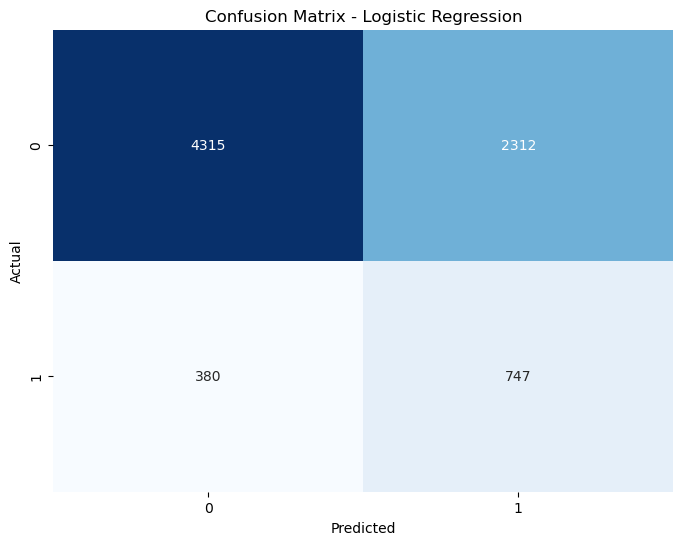

In [46]:
# 1. Baseline Model: Logistic Regression
print("Training Logistic Regression model...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
lr_pred = lr_model.predict(X_test_processed)
lr_pred_proba = lr_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, lr_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, lr_pred_proba):.4f}")

# Display confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [47]:
# 2. Decision Tree Classifier
print("\nTraining Decision Tree model...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
dt_pred = dt_model.predict(X_test_processed)
dt_pred_proba = dt_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print(f"Precision: {precision_score(y_test, dt_pred):.4f}")
print(f"Recall: {recall_score(y_test, dt_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, dt_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, dt_pred_proba):.4f}")


Training Decision Tree model...

Decision Tree Results:
Accuracy: 0.7520
Precision: 0.2056
Recall: 0.2467
F1 Score: 0.2243
ROC AUC Score: 0.5423


In [48]:
# 3. Random Forest Classifier
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
rf_pred = rf_model.predict(X_test_processed)
rf_pred_proba = rf_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")


Training Random Forest model...

Random Forest Results:
Accuracy: 0.8510
Precision: 0.3852
Recall: 0.0417
F1 Score: 0.0753
ROC AUC Score: 0.6954


In [49]:
# 4. XGBoost Classifier
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
xgb_pred = xgb_model.predict(X_test_processed)
xgb_pred_proba = xgb_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the model
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, xgb_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, xgb_pred_proba):.4f}")


Training XGBoost model...

XGBoost Results:
Accuracy: 0.8521
Precision: 0.4057
Recall: 0.0382
F1 Score: 0.0697
ROC AUC Score: 0.7060


In [50]:
# Cross-validation to check for overfitting
print("\nPerforming cross-validation...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=cv, scoring='roc_auc')
    print(f"{name} - Mean ROC AUC: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")



Performing cross-validation...
Logistic Regression - Mean ROC AUC: 0.7163, Std: 0.0012
Decision Tree - Mean ROC AUC: 0.8450, Std: 0.0020
Random Forest - Mean ROC AUC: 0.9737, Std: 0.0007
XGBoost - Mean ROC AUC: 0.9466, Std: 0.0016


In [51]:
# Cell 1: Random Search
# Hyperparameter tuning using RandomizedSearchCV
print("\nPerforming hyperparameter tuning for Random Forest using RandomizedSearchCV...")

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,       # Cross-validation folds
    scoring='roc_auc',
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

random_search.fit(X_train_balanced, y_train_balanced)
best_rf_random = RandomForestClassifier(**random_search.best_params_, random_state=42)

print(f"Best parameters from Random Search: {random_search.best_params_}")
print(f"Best ROC AUC score from Random Search: {random_search.best_score_:.4f}")



Performing hyperparameter tuning for Random Forest using RandomizedSearchCV...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters from Random Search: {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 413}
Best ROC AUC score from Random Search: 0.9809


In [53]:
# Cell 2: Grid Search (Refined based on Random Search results)
print("\nPerforming refined hyperparameter tuning for Random Forest using GridSearchCV...")

# Define refined parameter grid based on RandomizedSearchCV results
param_grid = {
    'n_estimators': [350, 400, 450],  # Around 413
    'max_depth': [40, 50, 60],        # Around 50
    'max_features': ['sqrt'],         # Keep the best value
    'min_samples_split': [2, 3, 4],   # Around 2
    'min_samples_leaf': [1, 2, 3],    # Around 2
    'bootstrap': [False]              # Keep the best value
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_balanced, y_train_balanced)
best_rf_grid = RandomForestClassifier(**grid_search.best_params_, random_state=42)

print(f"Best parameters from Grid Search: {grid_search.best_params_}")
print(f"Best ROC AUC score from Grid Search: {grid_search.best_score_:.4f}")



Performing refined hyperparameter tuning for Random Forest using GridSearchCV...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters from Grid Search: {'bootstrap': False, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}
Best ROC AUC score from Grid Search: 0.9846


In [ ]:
# Train the best model with optimized hyperparameters
best_rf_grid.fit(X_train_balanced, y_train_balanced)

# Make predictions with the best model
best_rf_pred = best_rf_grid.predict(X_test_processed)
best_rf_pred_proba = best_rf_grid.predict_proba(X_test_processed)[:, 1]


In [ ]:
# Evaluate the best model
print("\nBest Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, best_rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, best_rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, best_rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, best_rf_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, best_rf_pred_proba):.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
models_to_plot = {
    'Logistic Regression': lr_pred_proba,
    'Decision Tree': dt_pred_proba,
    'Random Forest': rf_pred_proba,
    'XGBoost': xgb_pred_proba,
    'Best Random Forest': best_rf_pred_proba
}

for name, pred_proba in models_to_plot.items():
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    auc = roc_auc_score(y_test, pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [ ]:
# Feature importance for the best model
if hasattr(best_rf_model, 'feature_importances_'):
    # Get feature names (assuming we have them from the preprocessor)
    feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

    # Get feature importances
    importances = best_rf_model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances of the top 15 features
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(15), importances[indices][:15], align='center')
    plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()



In [ ]:
# Save the best model
import joblib
joblib.dump(best_rf_model, 'best_model.pkl')
print("\nBest model saved as 'best_model.pkl'")

Observations

- Document your observations

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary

Good work completing all the steps till now!
Now, go ahead and summarize your entire work and findings below:

-

-

-

---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.